# Vectors Applications

## Pearson Correlation

Correlation is one of the most fundamental and important analysis methods in statistics and machine learning. \
A <B>correlation coefficient</b> is a single number that quantifies the linear relationship between two variables.

Correlation coefficients range from -1 to +1, with 0 indicating no linear relationship.

The correlation coefficient requires some normalizations to be in the expected range of -1 to +1. Those two normalizations are:
- <b>Mean center each variable</b>. That means to subtract the average value from each data value
- <b>Divide the dot product by the product of the vector norms</b>. This divisive normalization cancels the measurement units and scales the maximum possible correlation magnitude to |1|

From a linear algebra point of view, the Pearson correlation coefficient is the dot product between two variables, normalized by the magnitudes of the variables.

In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import colors as col
from numpy import genfromtxt

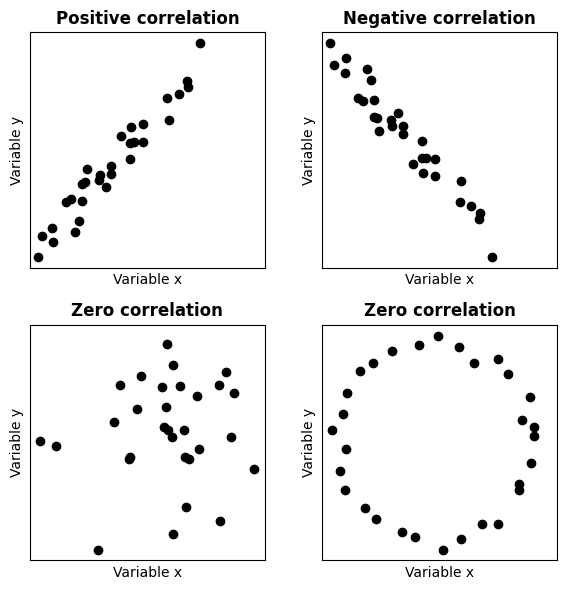

In [3]:
N = 30

# correlated random variables
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)

# set up figure
_,axs = plt.subplots(2,2,figsize=(6,6))

# positive correlation
axs[0,0].plot(x,y,'ko')
axs[0,0].set_title('Positive correlation',fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')

# negative correlation
axs[0,1].plot(x,-y,'ko')
axs[0,1].set_title('Negative correlation',fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')

# zero correlation, part 1
axs[1,0].plot(np.random.randn(N),np.random.randn(N),'ko')
axs[1,0].set_title('Zero correlation',fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')

# zero correlation, part 2
x = np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
axs[1,1].plot(x,y,'ko')
axs[1,1].set_title('Zero correlation',fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')

plt.tight_layout()
plt.show()

In [4]:
# positive correlation
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)

corr = np.corrcoef(x,y)
#print(corr[0,1])

# negative correlation
y = -y

corr = np.corrcoef(x,y)
#print(corr[0,1])

# zero correlation
x = np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20

corr = np.corrcoef(x,y)
print(corr[0,1])

corr2 = sp.stats.pearsonr(x,y)[0]
print(corr2)


### --------------- create an algorithm that calculate the correlation coefficient ---------------
def correlation_coeff(x,y):
    # center mean the vectors
    centered_x = x - x.mean()
    centered_y = y - y.mean()

    # calculate unit vector of each mean centered vector (possible also with np.linalg.norm(v))
    norm_x = np.sqrt(np.sum(centered_x**2))
    norm_y = np.sqrt(np.sum(centered_y**2))

    dot = centered_x.dot(centered_y)

    return dot / (norm_x * norm_y)

print(correlation_coeff(x,y))



-0.01148283360517892
-0.011482833605178927
-0.011482833605178907


### Cosine Similarity

The formula for cosine similarity is simply the geometric formula for the dot product, solved for the cosine term. Cosine similarity doesn't involve the first normalization factor (vectors aren't mean centered)

$cos(θ_{xy}) = \frac{α}{||x|| * ||y||}$

where α is the dot product between x and y (not mean centered)

In [5]:
def cosineSimilarity(x,y):
    dot = x.dot(y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)

    return dot / (norm_x * norm_y)

## example and difference between pearson correlation and cosine similarity

x = np.array([0,1,2,3])
y = np.array([100,101,102,103])

# pearson correlation
print(correlation_coeff(x,y))

# cosine similarity
print(cosineSimilarity(x,y))

'''
Although both reflect the linear relationship between the two variables (they are both based on the dot product, which is a linear operation), 
from the point of view of the cosine similarity, the two vectors are not perfectly correlated, because they are not in the same numerical scale
whereas from the pearson's point of view, they are perfectly correlated because augmenting of one unit the first vector result in augmenting of on unit the second vector
'''

0.9999999999999998
0.8083174787557303


"\nAlthough both reflect the linear relationship between the two variables (they are both based on the dot product, which is a linear operation), \nfrom the point of view of the cosine similarity, the two vectors are not perfectly correlated, because they are not in the same numerical scale\nwhereas from the pearson's point of view, they are perfectly correlated because augmenting of one unit the first vector result in augmenting of on unit the second vector\n"

## K-Means Clustering

<b>K-means clustering</b> is an unsupervised method of classifying multivariate data into a relatively small number of groups, or categories, based on minimizing distance to the group center.


The algorithm imply:
- Initialize k centroids as random (or better with K++ method, so that they are already spreaded out) points in the data space. Each centroid is a <i>class</i> or category, and the next step will apply each data observation to each class.
- Compute the Euclidean distance between each data observation and each centroid
- Assign each data observation to the group with the closest centroid
- Update each centroid as the average of all data observations assigned to that centroid
- Repeat steps 2 to 4 until a convergence criteria is satisfied, or for N interations


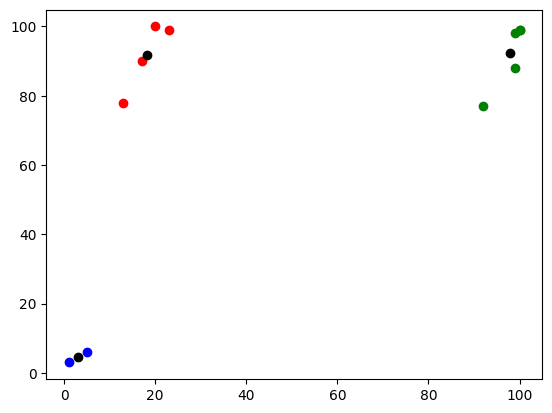

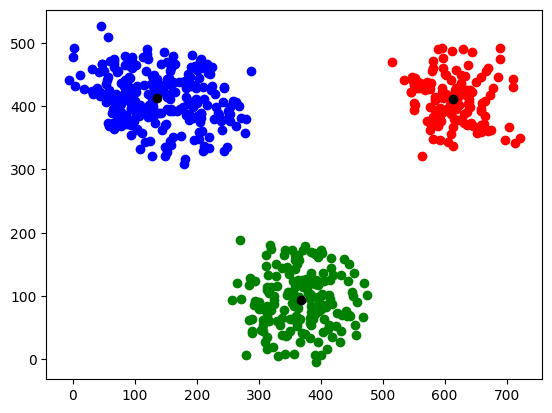

In [15]:
def k_means(X, k, max_iters=100):
    # Initialize centroids with K++ method
    def K_pp(X,k):
        centroids = np.zeros([k, X.shape[1]])
        centroids[0] = centroids[0] + [X[np.random.randint(X.shape[0])]]
        for i in range(k-1):
            #eliminate 0 rows from centroids
            mask_c = (centroids[:, 0] == 0) & (centroids[:, 1] == 0)
            c = centroids[~mask_c]

            # exclude centroids from points to consider:
            mask_x = np.in1d(X[:, 0], centroids[:, 0]) & np.in1d(X[:, 1], centroids[:, 1])
            other_values = X[~mask_x]

            # calculate distance of all points from the centroids
            distances = np.zeros([other_values.shape[0],c.shape[0]])
            for i in range(c.shape[0]):
                distances[:,i] = np.sqrt(np.sum((other_values - c[i,:])**2, axis=1)) 

            total_distance = np.sum(distances, axis=1)

            # find the farthest point and add it to the centroids
            labels = np.argmax(total_distance)
            centroids[i+1]= other_values[labels]
        return centroids
    
    centroids = K_pp(X,k)

    for _ in range(max_iters):
        # Assign each data point to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids based on the mean of the assigned data points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(new_centroids == centroids):
            break
        
        centroids = new_centroids
   
    observations_with_group = np.hstack([X,labels.reshape(len(X),1)])
    colors = ['green','blue','red','violet', 'turquoise', 'orangered']
    fig, ax = plt.subplots()
    for el in observations_with_group:
        plt.scatter(el[0], el[1], c=colors[el[2]])

    for c in centroids:
        plt.scatter(c[0],c[1],c='black')

observations = np.array([[1,3], [5,6],[20,100], [13,78], [23,99], [17,90], [100,99],[100,99],[92,77],[99,98],[99,88]])
k=3
k_means(observations,k)

raw_data = genfromtxt('data/01_Vectors_2/k_mean.csv', delimiter=',')
X = raw_data[:,[0,1]]
X = X.astype('int')

k_means(X,k)



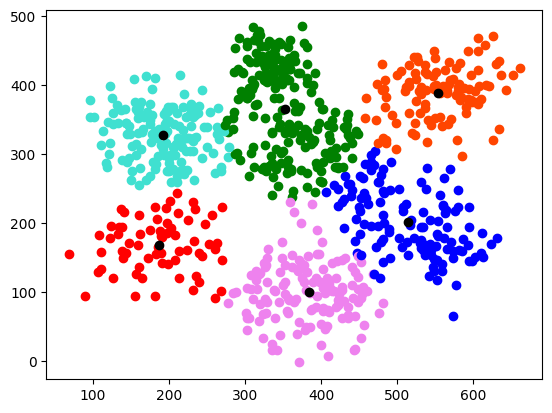

In [17]:

raw_data = genfromtxt('data/01_Vectors_2/k_mean_2.csv', delimiter=',')
X = raw_data[:,[0,1]]
X = X.astype('int')
k = 3

k_means(X,6)